In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.decomposition import TruncatedSVD, PCA
from sympy import diff, symbols, cos, sin, tan
import math
from scipy.misc import derivative
from scipy.optimize import minimize, brute, differential_evolution, fmin

# Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [3]:
for i in range(len(raitings)):
    n = 0
    for j in range(len(raitings)):
        if i != j:
            x = raitings[i]
            y = raitings[j]
            cos = np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))
            if cos > n:
                n = cos
                user = j + 1
    print('Наиболее похожий пользователь на пользователя', i+1, 'является', user)

Наиболее похожий пользователь на пользователя 1 является 9
Наиболее похожий пользователь на пользователя 2 является 5
Наиболее похожий пользователь на пользователя 3 является 10
Наиболее похожий пользователь на пользователя 4 является 10
Наиболее похожий пользователь на пользователя 5 является 9
Наиболее похожий пользователь на пользователя 6 является 10
Наиболее похожий пользователь на пользователя 7 является 4
Наиболее похожий пользователь на пользователя 8 является 6
Наиболее похожий пользователь на пользователя 9 является 1
Наиболее похожий пользователь на пользователя 10 является 3


b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [4]:
TruncatedSVD(n_components=5).fit_transform(raitings)

array([[23.41982063, -5.36092136,  3.83196779, -4.06950174,  1.10267269],
       [24.76774917,  4.52188701,  1.35815965,  1.58128545,  8.59912002],
       [22.27728589, -6.96492049, -4.84461485, -0.47661647,  3.37152266],
       [19.4257757 ,  2.64575227, -6.86014009, -4.76604765,  1.96075707],
       [22.8146354 ,  0.51464093,  7.70180188,  4.42379773,  1.29124163],
       [21.76961656,  1.94294987, -4.56934779,  8.32306487, -2.21887359],
       [21.23427453,  9.78047778,  1.16340271, -4.86074521, -2.60815471],
       [19.97476815,  4.00048677, -1.67456316,  1.1512346 , -3.5637169 ],
       [26.39306998, -3.03090482,  5.86422753, -1.67503491, -3.71500141],
       [29.94016844, -4.82012297, -3.48912415,  0.05527083, -3.62526487]])

# Задание 2
Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

На "бумаге":

$$f'(x)=2{\cdot}tan(sin(x)+cos(2x+3)){\cdot}(1+tan^2(sin(x)+cos(2x+3))){\cdot}(cos(x)-2{\cdot}sin(2x+3))$$
$$f'(1)=2{\cdot}tan(sin(1)+cos(2{\cdot}1+3)){\cdot}(1+tan^2(sin(1)+cos(2{\cdot}1+3))){\cdot}(cos(1)-2{\cdot}sin(2{\cdot}1+3))=55.3859176464222$$

In [17]:
def f(x):
    return math.tan(math.sin(x) + math.cos(2*x+3))**2
derivative(f, 1.0, dx=1e-6)

55.3859176464222

# Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error

In [6]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [7]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [8]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

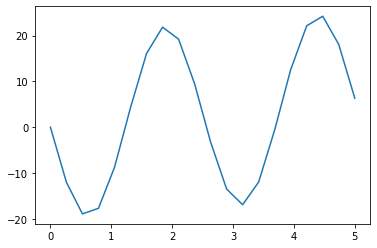

In [9]:
plt.plot(x, fx)
plt.show()

In [10]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [11]:
f"a={differential_evolution(error, [(-5, 5), (-5, 5)]).x[0]} b={differential_evolution(error, [(-5, 5), (-5, 5)]).x[1]}"

'a=3.0000000005911707 b=-2.499999999975435'

# Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

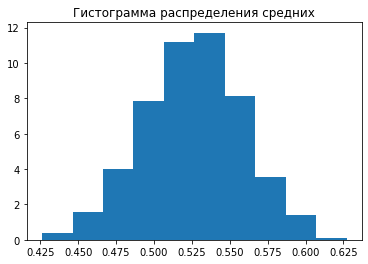

In [13]:
value = np.random.random(20)
value2 = np.random.random(20) 
probabilities = value2 / value2.sum()
n = 50
sample = 1000
array_ = np.array([])
for number in range(sample):
    values = np.random.choice(value, n, p=probabilities)
    array_ = np.append(array_, values.mean())
label_ = 'sample of ' + str(n) + ' histogram'
plt.hist(array_, density=True, label=label_)
plt.title("Гистограмма распределения средних")
plt.show()

# Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

[1, 1]]

На "бумаге":

$(1 - \lambda)^2-4 = 0$

$(1 - \lambda)^2 = 4$

$1 - \lambda = 2 $

$1 - \lambda = -2$

Собственные значения:

$\lambda_1 = -1 $

$\lambda_2 = 3 $

$\begin{equation*}
 \begin{cases}
   2x + 4y = 0, 
   \\
   x + 2y = 0.
 \end{cases}
\end{equation*}\;\;\;$ $\Rightarrow\;$ $ x = -2y$

$\begin{equation*}
 \begin{cases}
   -2x + 4y = 0, 
   \\
   x - 2y = 0.
 \end{cases}
\end{equation*}\;\;$ $\Rightarrow\;$ $ x = 2y$

Собственные вектора матрицы:

$\begin{pmatrix}2 \\ 1\end{pmatrix} $ 

$\begin{pmatrix}2 \\ -1\end{pmatrix} $ 

In [16]:
print('Собственные значения: \n',np.linalg.eig(np.array([[1, 4],[1, 1]]))[0], '\n', 'Собственные вектора матрицы: \n',np.linalg.eig(np.array([[1, 4],[1, 1]]))[1])

Собственные значения: 
 [ 3. -1.] 
 Собственные вектора матрицы: 
 [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]
